# Sales Analysis 

In [59]:
import pandas as pd
import os

## Task1: Merging 12 months of sales data into a single file

In [10]:
df = pd.read_csv("./datasets/Sales_April_2019.csv")

files = [file for file in os.listdir('./datasets')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./datasets/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)
# df.head()

### Read in update dataframe

In [40]:
all_data = pd.read_csv("./all_data.csv")

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [42]:
all_data.shape

(186850, 6)

### Clean up the data

#### Drop rows of NAN

In [43]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.shape

(545, 6)

In [44]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

#### Find 'Or' and delete it

In [45]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.shape

(355, 6)

In [46]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.shape

(185950, 6)

#### Convert columns to the correct value

In [54]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

## Augment data with additional columns

### Task 2: Add Month Column

In [48]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",1
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",1
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",1
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",1
186849,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215",1


#### Task 3: Add a sales column

In [55]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1: What was the best month for sales? How much was earned that month?

In [58]:
# Groupby
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [60]:
import matplotlib.pyplot as plt

In [61]:
results = all_data.groupby("Month").sum()

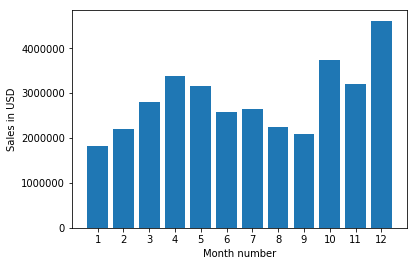

In [66]:
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()